# **1. Configuración del Ambiente**


---

In [14]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. EDA**


---

In [15]:
df_usa = pd.read_csv('../data/usa_clean.csv', sep=';')
df_usa.head()

,price,bed,bath,size(feet),state,id
0,105000.0,3.0,2.0,920.0,Puerto Rico,0
1,80000.0,4.0,2.0,1527.0,Puerto Rico,1
2,67000.0,2.0,1.0,748.0,Puerto Rico,2
3,145000.0,4.0,2.0,1800.0,Puerto Rico,3
4,179000.0,4.0,3.0,2520.0,Puerto Rico,5


In [16]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909258 entries, 0 to 909257
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       909258 non-null  float64
 1   bed         909258 non-null  float64
 2   bath        909258 non-null  float64
 3   size(feet)  909258 non-null  float64
 4   state       909258 non-null  object 
 5   id          909258 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 41.6+ MB


In [17]:
# Resumen estadístico
desc_numerico = df_usa.describe()
desc_categorico = df_usa.describe(include=['object'])

print("Resumen Estadístico de Variables Numéricas:")
print(desc_numerico)

print("\nResumen Estadístico de Variables Categóricas:")
print(desc_categorico)

Resumen Estadístico de Variables Numéricas:
              price            bed           bath    size(feet)            id
count  9.092580e+05  909258.000000  909258.000000  9.092580e+05  9.092580e+05
mean   6.349721e+05       3.318567       2.580093  2.147009e+03  7.111332e+05
std    2.885821e+06       1.557444       1.547605  4.962374e+03  4.060730e+05
min    0.000000e+00       1.000000       0.000000  4.000000e+00  0.000000e+00
25%    2.390000e+05       3.000000       2.000000  1.328000e+03  3.674135e+05
50%    3.800000e+05       3.000000       2.000000  1.805000e+03  7.210970e+05
75%    6.240000e+05       4.000000       3.000000  2.506000e+03  1.066947e+06
max    2.147484e+09     444.000000     460.000000  1.560780e+06  1.391305e+06

Resumen Estadístico de Variables Categóricas:
          state
count    909258
unique       55
top     Florida
freq     113567


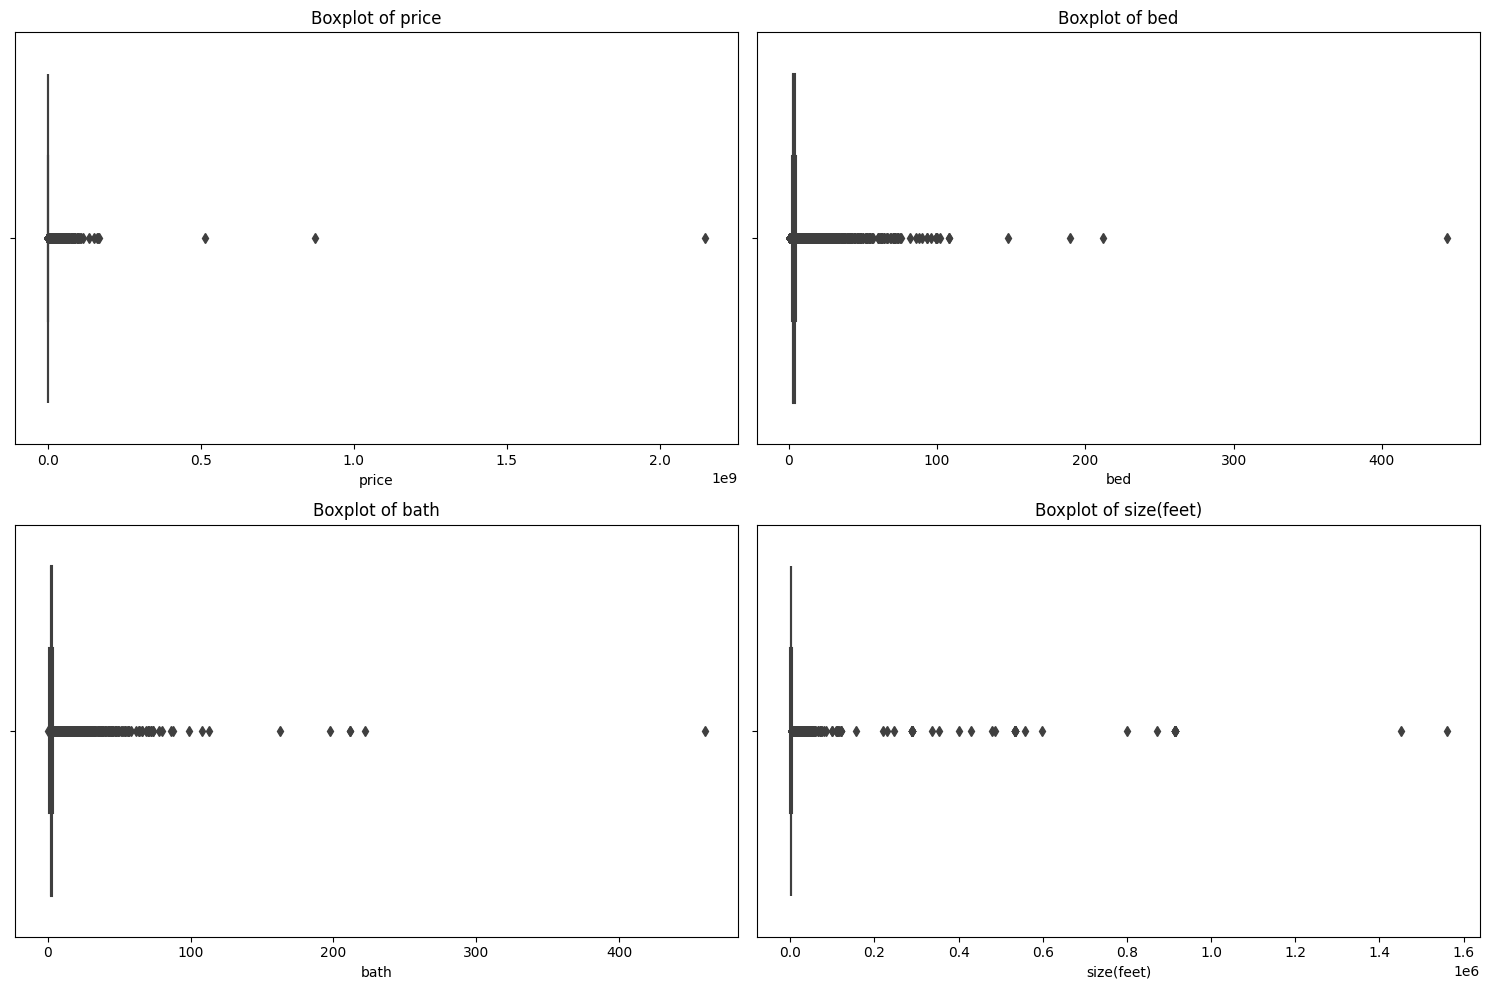

In [18]:
# Crear una lista de las columnas continuas
continuous_columns = ['price', 'bed', 'bath', 'size(feet)']

# Ajustar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada columna continua
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Crear un subplot en una cuadrícula de 2x2
    sns.boxplot(x=df_usa[column])
    plt.title(f'Boxplot of {column}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [19]:

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Definir las columnas continuas
continuous_columns = ['price', 'bed', 'bath', 'size(feet)']

# Eliminar los outliers
df_usa_cleaned = remove_outliers(df_usa, continuous_columns)

# Verificar la información del DataFrame después de eliminar los outliers
print(df_usa_cleaned.info())

# Mostrar las primeras filas del DataFrame limpio para verificar visualmente
print(df_usa_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 744757 entries, 0 to 909256
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       744757 non-null  float64
 1   bed         744757 non-null  float64
 2   bath        744757 non-null  float64
 3   size(feet)  744757 non-null  float64
 4   state       744757 non-null  object 
 5   id          744757 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 39.8+ MB
None
      price  bed  bath  size(feet)        state  id
0  105000.0  3.0   2.0       920.0  Puerto Rico   0
1   80000.0  4.0   2.0      1527.0  Puerto Rico   1
2   67000.0  2.0   1.0       748.0  Puerto Rico   2
3  145000.0  4.0   2.0      1800.0  Puerto Rico   3
4  179000.0  4.0   3.0      2520.0  Puerto Rico   5


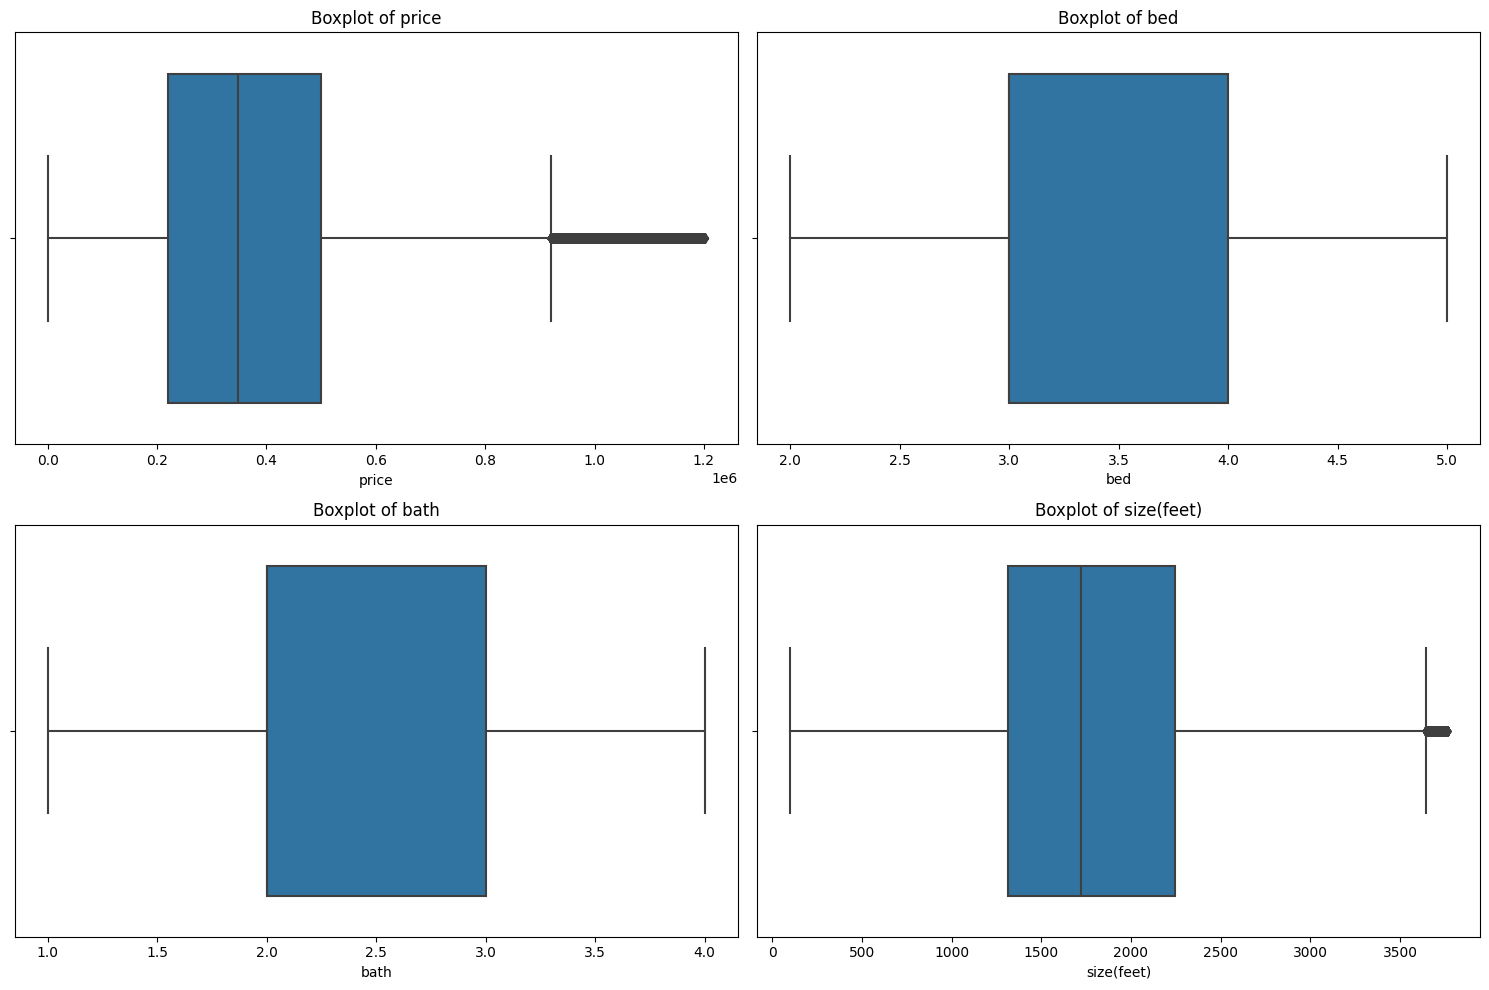

In [20]:
# Crear una lista de las columnas continuas
continuous_columns = ['price', 'bed', 'bath', 'size(feet)']

# Ajustar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada columna continua
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Crear un subplot en una cuadrícula de 2x2
    sns.boxplot(x=df_usa_cleaned[column])
    plt.title(f'Boxplot of {column}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

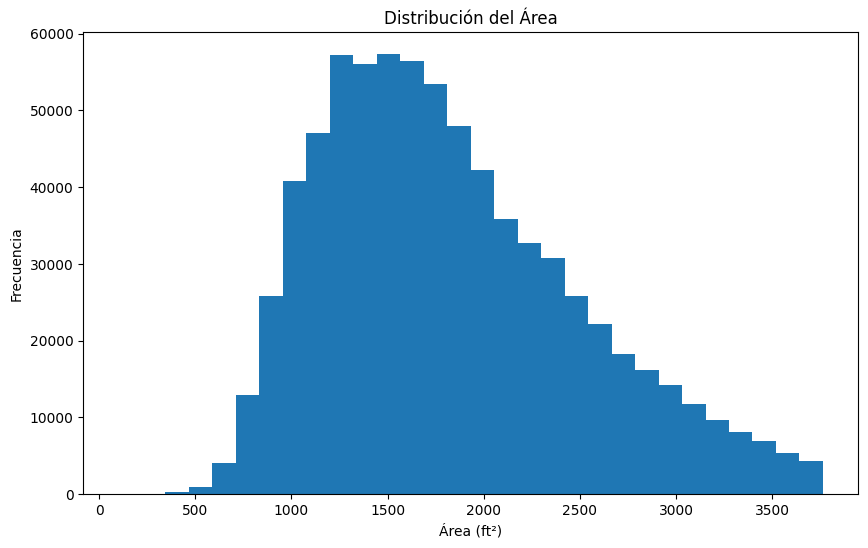

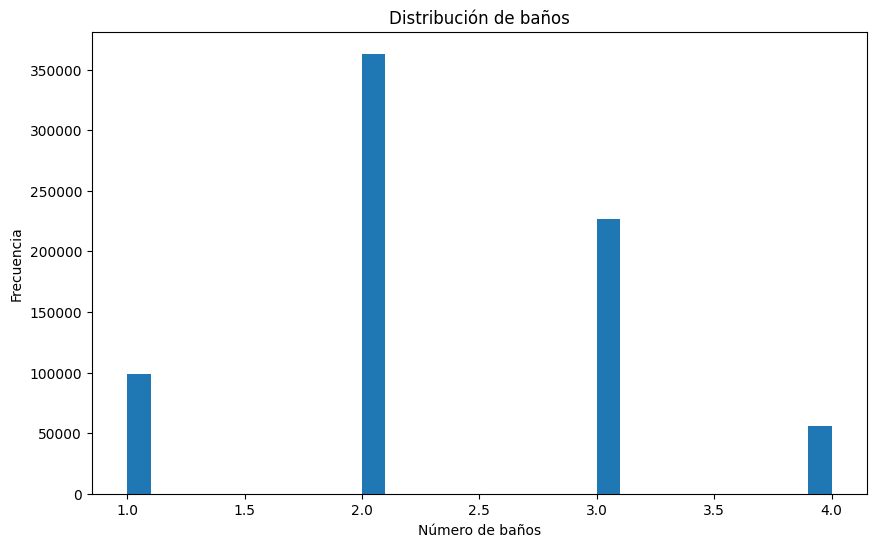

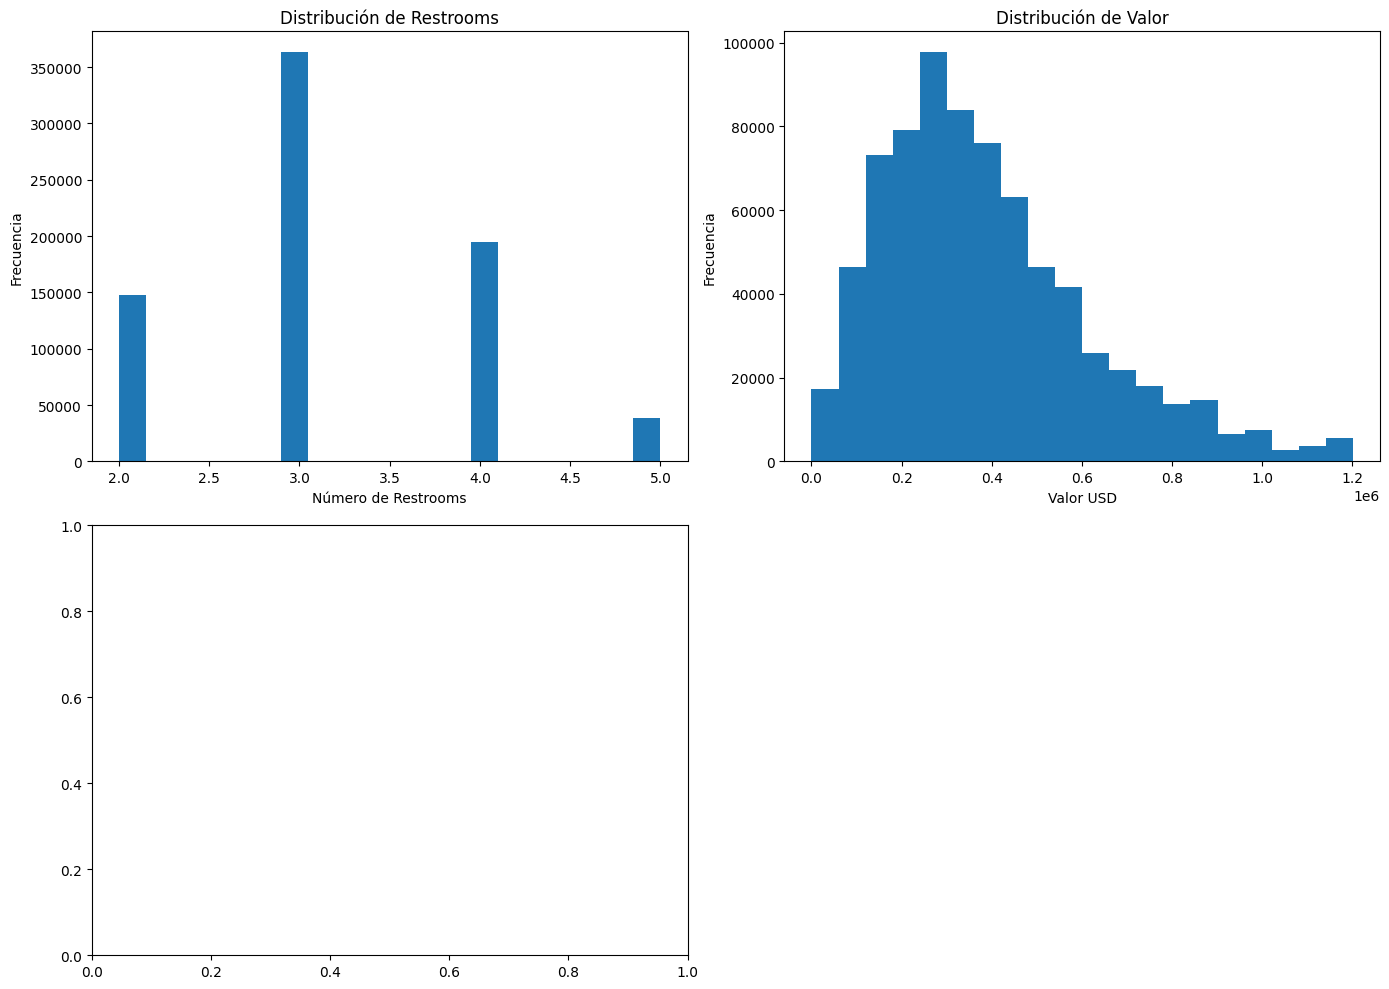

In [21]:
# Histograma de Área
plt.figure(figsize=(10, 6))
df_usa_cleaned['size(feet)'].hist(bins=30)
plt.title('Distribución del Área')
plt.xlabel('Área (ft²)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Histograma de Habitaciones
plt.figure(figsize=(10, 6))
df_usa_cleaned['bath'].hist(bins=30)
plt.title('Distribución de baños')
plt.xlabel('Número de baños')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Histogramas de las demás variables numéricas en un solo gráfico
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de Baños
axs[0, 0].hist(df_usa_cleaned['bed'], bins=20)
axs[0, 0].set_title('Distribución de Restrooms')
axs[0, 0].set_xlabel('Número de Restrooms')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma de Valor
axs[0, 1].hist(df_usa_cleaned['price'], bins=20)
axs[0, 1].set_title('Distribución de Valor')
axs[0, 1].set_xlabel('Valor USD')
axs[0, 1].set_ylabel('Frecuencia')

# Ocultar el cuarto subplot vacío
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

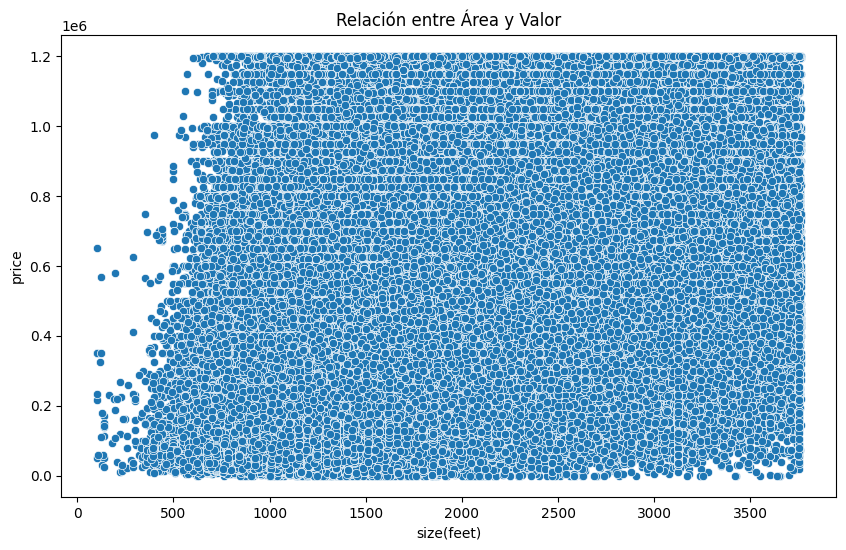

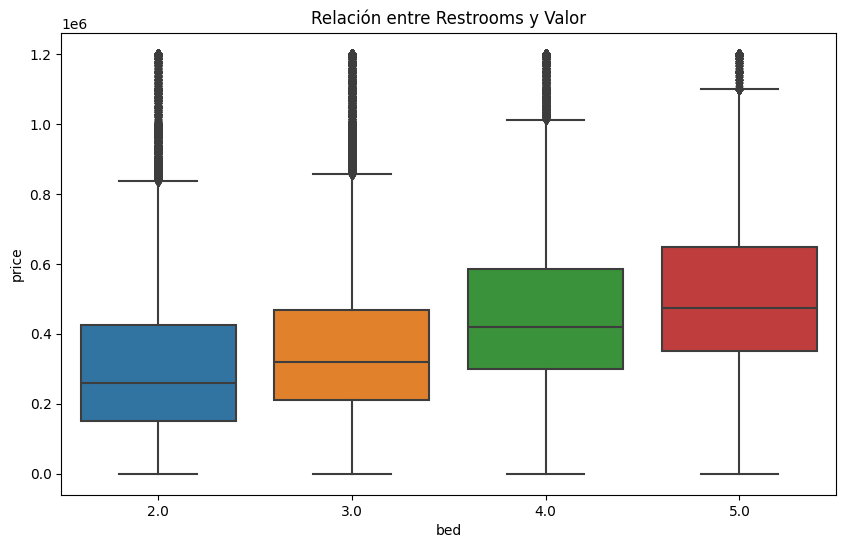

In [22]:
# Relación entre 'Área' y 'Valor'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_usa_cleaned, x='size(feet)', y='price')
plt.title('Relación entre Área y Valor')
plt.show()

# Relación entre 'Habitaciones' y 'Valor'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_usa_cleaned, x='bed', y='price')
plt.title('Relación entre Restrooms y Valor')
plt.show()


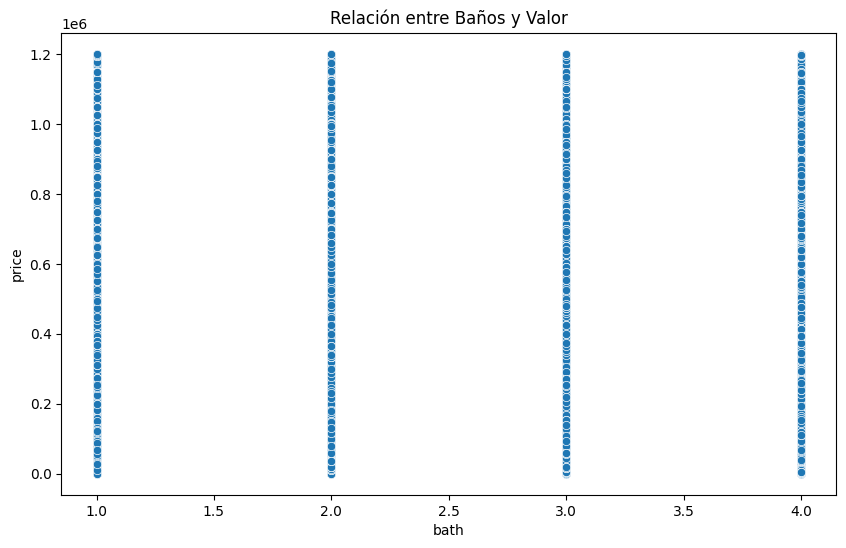

In [23]:
# Relación entre 'Baños' y 'Valor'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_usa_cleaned, x='bath', y='price')
plt.title('Relación entre Baños y Valor')
plt.show()